<a href="https://colab.research.google.com/github/jlutz096/Machine-Learning-Notes-Projects/blob/master/Machine_Learning_Flower_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This is the Image Classification Machine Learning software example from the Tensorflow website. 

In [2]:
#import tensorflow and other needed libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [4]:
#here we are going to import the pictures for this software. it is 3700 images of flowers.
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar =True)
data_dir = pathlib.Path(data_dir)

In [6]:
#verify images are downloaded and total
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


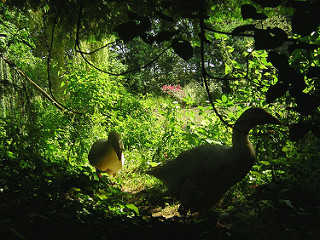

In [7]:
#here are some roses
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

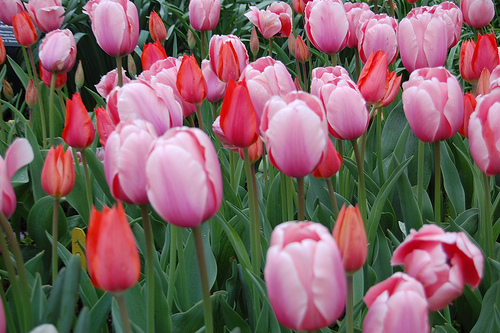

In [8]:
#here are some tulips
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
PIL.Image.open(str(tulips[1]))

In [10]:
#Create a dataset
#define some parameters for the loader:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
# its good practice to use a validation spilit when developing your model. We will use 80% of the images for training, and 20% for validation

In [27]:
#create training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 123,
  image_size = (img_height,img_width),
  batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [28]:
#create val
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 123,
  image_size = (img_height,img_width),
  batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [29]:
#find class names
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


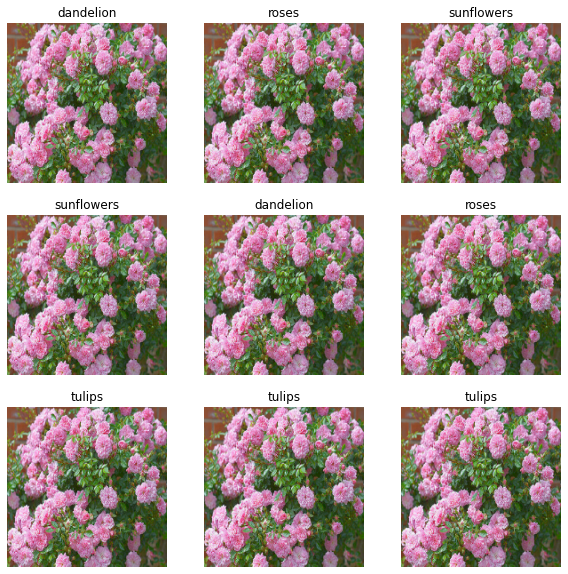

In [32]:
#visualizr the data
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
      ax = plt.subplot(3,3,i+1)
      plt.imshow(images[1].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")

In [35]:
#configure the dataset
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
#standardize the data
normaliation_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [45]:
#using this layer
#normalized_ds = train_ds.map(lambda x, y: (normaliation_layer(x),y))
#image_batch,labels_batch = next(iter(normalized_ds))
#first_image = image_batch[0]
#notice the pixels values are now in '[0,1]'
#print(np.min(first_image), np.max(first_image))


In [47]:
#create the model with the standard layer inside the model definition
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
  layers.Conv2D(16,3,padding ='same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32,3,padding='same', activation = 'relu'), 
  layers.MaxPooling2D(),
  layers.Conv2D(64,3,padding='same', activation = 'relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)                
])

In [48]:
#compile the model to show optimizer and loss during training and validation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [49]:
#model to view all layers of the network using the model summary method
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [50]:
#train the model
epochs=10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 90s 975ms/step - loss: 1.3465 - accuracy: 0.4176 - val_loss: 1.1487 - val_accuracy: 0.5191
Epoch 2/10
92/92 [==============================] - 88s 956ms/step - loss: 1.0135 - accuracy: 0.5974 - val_loss: 0.9567 - val_accuracy: 0.6431
Epoch 3/10
92/92 [==============================] - 88s 955ms/step - loss: 0.8365 - accuracy: 0.6822 - val_loss: 0.9184 - val_accuracy: 0.6403
Epoch 4/10
92/92 [==============================] - 88s 957ms/step - loss: 0.5934 - accuracy: 0.7745 - val_loss: 0.9579 - val_accuracy: 0.6553
Epoch 5/10
92/92 [==============================] - 88s 958ms/step - loss: 0.3792 - accuracy: 0.8716 - val_loss: 1.0817 - val_accuracy: 0.6567
Epoch 6/10
92/92 [==============================] - 88s 959ms/step - loss: 0.2107 - accuracy: 0.9254 - val_loss: 1.4854 - val_accuracy: 0.6063
Epoch 7/10
92/92 [==============================] - 88s 960ms/step - loss: 0.1479 - accuracy: 0.9550 - val_loss: 1.3591 - val_accuracy: 0.6485

<function matplotlib.pyplot.show>

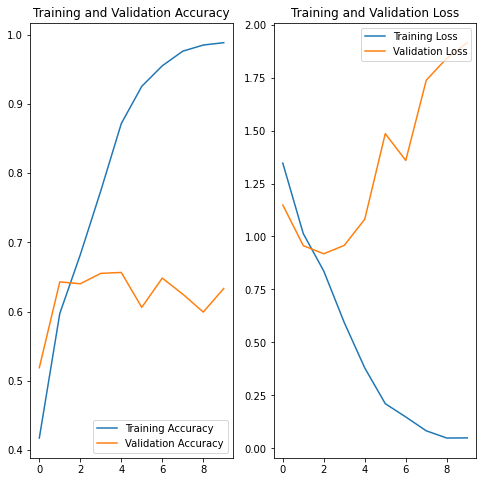

In [51]:
#visualize the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show

In [55]:
#data augmentation to help with overfitting
#data augmentation takes the approach of generating additional training data from your existing examples by augmenting then using random transformations
#that yield believealbe-looking images.

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape = (img_height,
                                                                img_width,
                                                                3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

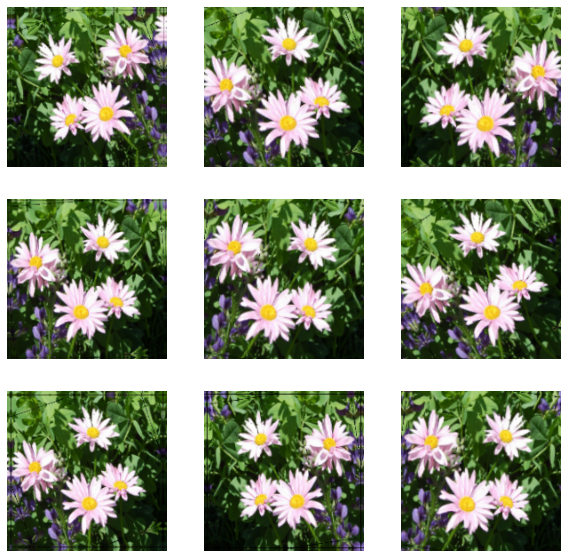

In [56]:
#visualize a few augmented examples by applying data augmentation to the same image several times:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Dropout: another technique to reduce overfitting is to introduce dropout to the network, a form of regularization.
when you apply dropout to a layer it randomly drops out (by setting the activation to zero) a number of input units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1,0.2,0.4, etc. This means dropping out 10%,20% or 40% of the output units randomly from the applied layer.

In [58]:
#dropout
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16,3,padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    
    ])

In [60]:
#compile and train the model again w/dropout
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 64)       

In [62]:
#training the model
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 105s 1s/step - loss: 1.3468 - accuracy: 0.4074 - val_loss: 1.3145 - val_accuracy: 0.4564
Epoch 2/15
92/92 [==============================] - 104s 1s/step - loss: 1.0701 - accuracy: 0.5749 - val_loss: 0.9669 - val_accuracy: 0.6008
Epoch 3/15
92/92 [==============================] - 104s 1s/step - loss: 0.9812 - accuracy: 0.6046 - val_loss: 1.0368 - val_accuracy: 0.5967
Epoch 4/15
92/92 [==============================] - 104s 1s/step - loss: 0.9265 - accuracy: 0.6522 - val_loss: 0.9398 - val_accuracy: 0.6281
Epoch 5/15
92/92 [==============================] - 105s 1s/step - loss: 0.8505 - accuracy: 0.6757 - val_loss: 0.8444 - val_accuracy: 0.6608
Epoch 6/15
92/92 [==============================] - 105s 1s/step - loss: 0.8033 - accuracy: 0.6873 - val_loss: 0.8273 - val_accuracy: 0.6717
Epoch 7/15
92/92 [==============================] - 105s 1s/step - loss: 0.7812 - accuracy: 0.7003 - val_loss: 0.8702 - val_accuracy: 0.6553
Epoch 8/15
92

<function matplotlib.pyplot.show>

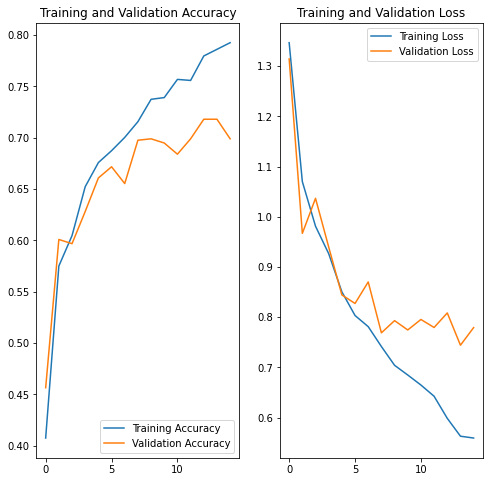

In [63]:
#vizualize the training results again w/dropout
#visualize the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show

In [70]:
#predict new data
#make prediction with picutre of flower that wasnt included in training or validation

sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower',origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) #create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to () with a (:.2f) percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to () with a (:.2f) percent confidence.
